In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import accuracy_score

In [2]:
data = np.load('D:\HomeWork\Machine Learning\ML_HW04\ML_HW04\ML_HW04\data\olivetti_faces.npy')
y = list()

for i in range(40):
    for j in range(10):
        y.append(i)

In [3]:
data = data.reshape((400 , 64*64))

In [4]:
X_train, X_rem, y_train, y_rem = train_test_split(data, y,
                                                    stratify=y, 
                                                    train_size=0.7)

X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem,
                                                    stratify=y_rem, 
                                                    train_size=0.5)

In [158]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,39))

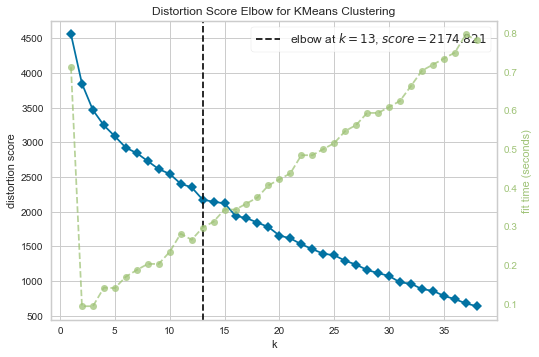

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [159]:
visualizer.fit(X_valid)        # Fit the data to the visualizer
visualizer.show()

In [5]:
kmeans = KMeans(n_clusters=13).fit(X_train)

In [6]:
kmeans.labels_

array([10,  2,  6,  3,  8, 10,  3,  1,  0,  1,  9,  3,  5,  5, 11,  9, 10,
        3,  4,  6,  4,  6,  2,  0,  0,  2,  1,  4,  1, 11,  3,  2,  8,  9,
        8,  4,  7,  5,  4,  3,  0,  0,  8,  1,  6,  8, 12, 10,  3, 10,  9,
        8,  4,  4,  4,  5,  5,  3,  9,  3,  3,  0,  1,  1,  0,  5, 10, 10,
       10,  3,  4,  2, 10,  0, 10, 10,  5,  7,  5,  1,  5,  4,  6,  0,  4,
        9,  5,  5,  6,  4,  4,  2,  7,  0, 10,  4,  3,  8, 10,  1,  6, 10,
        2,  4,  7,  6, 10,  2,  0,  5,  5, 10,  3,  8,  4,  4,  8,  5,  0,
        6, 10, 11,  4, 11,  2,  8, 10,  8,  5,  2,  0, 10, 12,  2,  4,  1,
        8,  9,  1,  5,  7,  2,  1,  3,  1,  1,  8,  4,  1, 10, 12,  5,  8,
        5,  0,  1,  8,  3,  7,  1,  0,  4,  1,  5,  1, 10,  2,  7,  1,  1,
       10,  2,  2,  5, 11, 12,  4,  2, 12,  5,  5,  0,  3,  3,  7,  8, 10,
        4,  1,  9,  1,  5,  1,  9,  5,  5,  4,  5,  0,  4,  7,  1, 10,  5,
        2, 10,  2,  3,  2,  0,  8, 10,  2,  2,  7,  8,  1,  5,  1,  4,  3,
        0,  5, 10,  4,  2

In [7]:
k = 13
X = X_test
mu = kmeans.cluster_centers_
newDatas = list()
for item in range(k):
    dist = []
    for i in range(len(X)):
        dist.append(np.linalg.norm(X[i] - mu[item]))
    newDatas.append(np.array(dist))
            
        
newLabels = np.argmin(np.array(newDatas), axis=0)

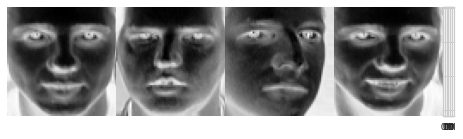

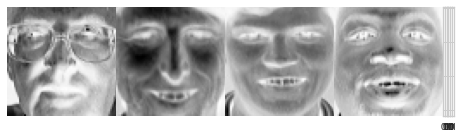

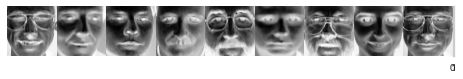

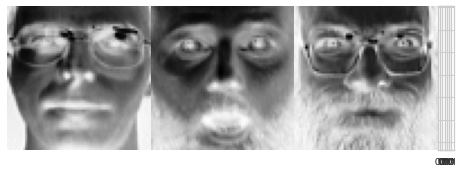

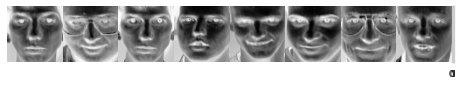

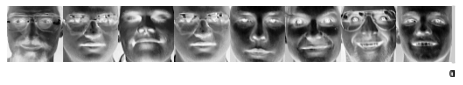

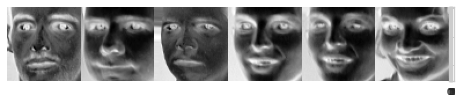

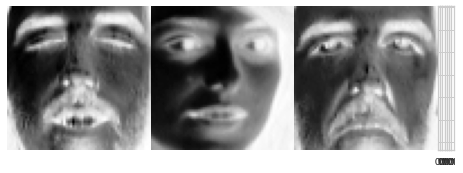

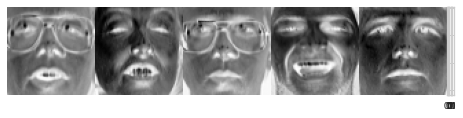

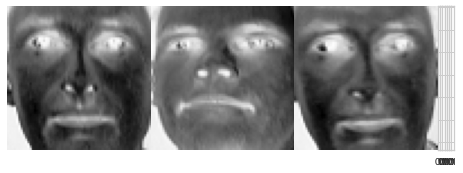

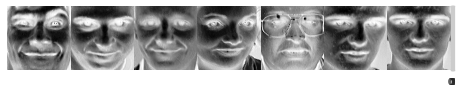

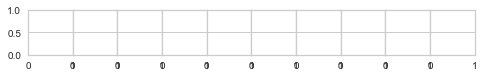

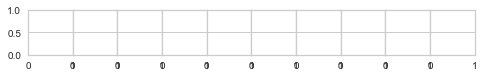

In [8]:
#Cluster 1
from mpl_toolkits.axes_grid1 import ImageGrid

imgArray = list()
for j in range(13):
    img = list()
    for i in range(len(newLabels)):
        if newLabels[i] == j:
            img.append(X_test[i])
    imgArray.append(img)
#         plt.imshow(X_test[i].reshape((64 , 64)))
for images in imgArray:
    fig = plt.figure()
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 10),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )
    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im.reshape(64 , 64))
        ax.axis('off')

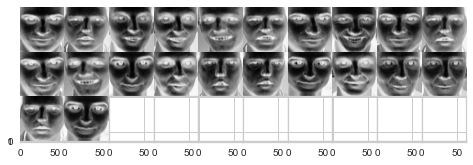

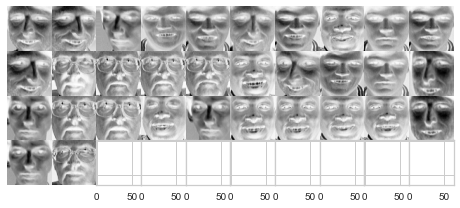

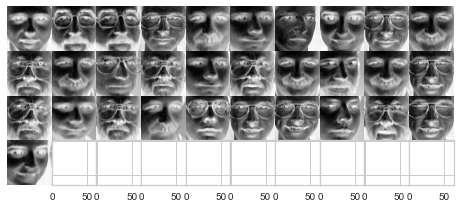

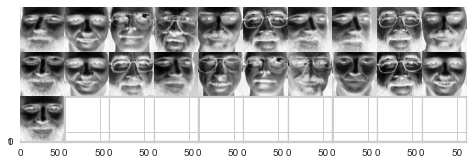

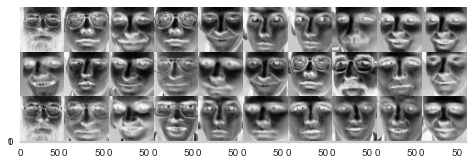

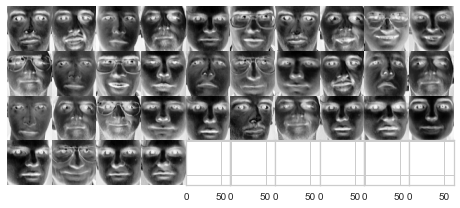

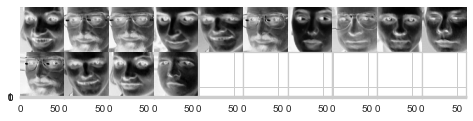

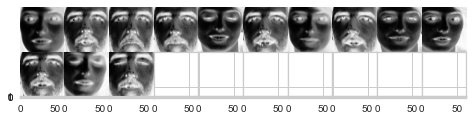

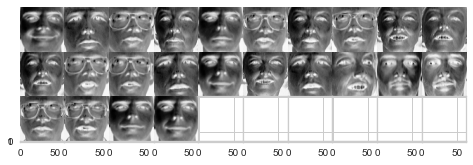

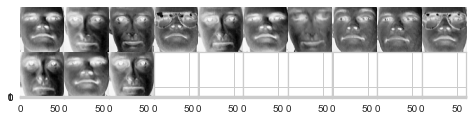

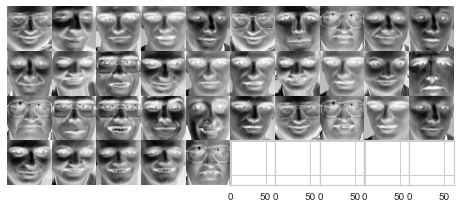

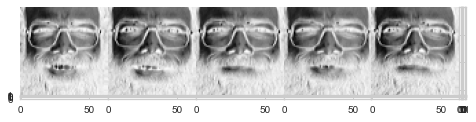

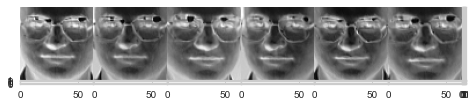

In [20]:
#Cluster 1
from mpl_toolkits.axes_grid1 import ImageGrid

imgArray = list()
for j in range(13):
    img = list()
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i] == j:
            img.append(X_train[i])
    imgArray.append(img)
for images in imgArray:
    fig = plt.figure()
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 10),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )
    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im.reshape(64 , 64))
        ax.axis('off')